### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# Import the dataset

You should download the modified version of the data set from the last module. 
Run the following code block to download the CSV file to this environment.


In [ ]:
# filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
# await skillsnetwork.download(filepath,'./laptops.csv')
# path = './laptops.csv'

>Note: In case you are using this lab offline, on your local machines, you may use the URL in `filepath` directly in the `pd.read_csv()` command to access the data.


Import the file to a pandas dataframe.


In [4]:
df = pd.read_csv('labtops.csv', header=0)
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Drop First Two columns

In [5]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Manufacturer', 'Category', 'GPU', 'OS',
       'CPU_core', 'Screen_Size_inch', 'CPU_frequency', 'RAM_GB',
       'Storage_GB_SSD', 'Weight_pounds', 'Price', 'Price-binned',
       'Screen-Full_HD', 'Screen-IPS_panel'],
      dtype='object')

In [6]:
df.drop('Unnamed: 0.1', axis = 1, inplace=True)

In [7]:
df.drop('Unnamed: 0', axis = 1 , inplace = True)

In [8]:
df

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Lenovo,4,2,1,7,14.0,0.896552,8,256,3.74850,1891,Medium,0,1
234,Toshiba,3,2,1,5,13.3,0.827586,8,256,2.64600,1950,Medium,1,0
235,Lenovo,4,2,1,5,12.0,0.896552,8,256,2.99880,2236,Medium,0,1
236,Lenovo,3,3,1,5,15.6,0.862069,6,256,5.29200,883,Low,1,0


# Get the information about dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      238 non-null    object 
 1   Category          238 non-null    int64  
 2   GPU               238 non-null    int64  
 3   OS                238 non-null    int64  
 4   CPU_core          238 non-null    int64  
 5   Screen_Size_inch  238 non-null    float64
 6   CPU_frequency     238 non-null    float64
 7   RAM_GB            238 non-null    int64  
 8   Storage_GB_SSD    238 non-null    int64  
 9   Weight_pounds     238 non-null    float64
 10  Price             238 non-null    int64  
 11  Price-binned      238 non-null    object 
 12  Screen-Full_HD    238 non-null    int64  
 13  Screen-IPS_panel  238 non-null    int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 26.2+ KB


# Evaluating Missing Values

In [11]:
missing_data = df.isnull()
missing_data

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,False,False,False,False,False,False,False,False,False,False,False,False,False,False
234,False,False,False,False,False,False,False,False,False,False,False,False,False,False
235,False,False,False,False,False,False,False,False,False,False,False,False,False,False
236,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Calculate the missing values in each column and get summary

In [12]:
for column in missing_data.columns.values.tolist():
    print (missing_data[column].value_counts())
    print("")  

Manufacturer
False    238
Name: count, dtype: int64

Category
False    238
Name: count, dtype: int64

GPU
False    238
Name: count, dtype: int64

OS
False    238
Name: count, dtype: int64

CPU_core
False    238
Name: count, dtype: int64

Screen_Size_inch
False    238
Name: count, dtype: int64

CPU_frequency
False    238
Name: count, dtype: int64

RAM_GB
False    238
Name: count, dtype: int64

Storage_GB_SSD
False    238
Name: count, dtype: int64

Weight_pounds
False    238
Name: count, dtype: int64

Price
False    238
Name: count, dtype: int64

Price-binned
False    238
Name: count, dtype: int64

Screen-Full_HD
False    238
Name: count, dtype: int64

Screen-IPS_panel
False    238
Name: count, dtype: int64



There is no missing values in our dataset

# Checking the data format

In [15]:
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [14]:
df.dtypes

Manufacturer         object
Category              int64
GPU                   int64
OS                    int64
CPU_core              int64
Screen_Size_inch    float64
CPU_frequency       float64
RAM_GB                int64
Storage_GB_SSD        int64
Weight_pounds       float64
Price                 int64
Price-binned         object
Screen-Full_HD        int64
Screen-IPS_panel      int64
dtype: object

# Task 1 - Visualize individual feature patterns

### Continuous valued features
Generate regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price". Also, print the value of correlation of each feature with "Price".


# Visualize the Regression plot for Cpu Frequency vs Price

Text(0.5, 1.0, 'Regression Plot of CPU Freq vs price')

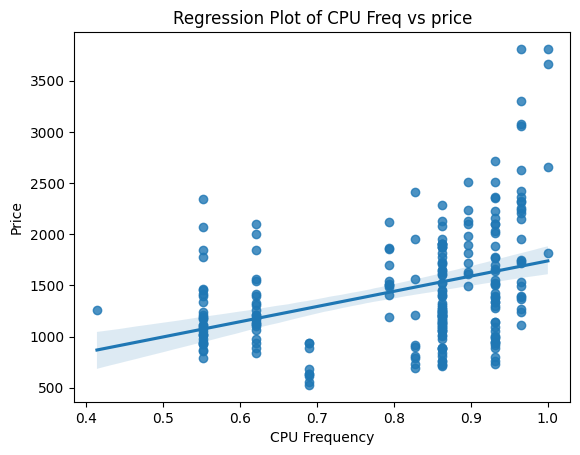

In [18]:
# Write your code below and press Shift+Enter to execute
# CPU_frequency plot
sns.regplot(x = 'CPU_frequency' , y = 'Price' , data=df)
plt.xlabel("CPU Frequency")
plt.ylabel("Price")
plt.title("Regression Plot of CPU Freq vs price")

From our Regression plot we can see the positive relationship between the CPU Frequency and price

# Get the Pearson Correlation between Cpu Frequency and Price

In [20]:
pearson_coef , p_value = stats.pearsonr(df['CPU_frequency'] , df['Price'])
print("Pearson Coefficient = ",pearson_coef)
print("p-value = " , p_value)

Pearson Coefficient =  0.36666555892588604
p-value =  5.5024633507134316e-09


Since ,pearson coefficient is 0.37 and p-value is less than 0.001 , Then we've a Strong certainty in the result but our coefficient is not close to 1 , so we can't use 'CPU Frequency' to Predict the "Price"

# Let's Get the Correlation Method only for 'Cpu Frequency' and 'Price'

In [23]:
df[['CPU_frequency' , 'Price']].corr()

,CPU_frequency,Price
CPU_frequency,1.000000,0.366666
Price,0.366666,1.000000


After we assure the correlation between the Cpu Frequency and Price , we can't depend on Cpu Frequency to predict the price

<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="CPU_frequency", y="Price", data=df)
plt.ylim(0,)
```

</details>


# Visualize the Regression Plot for Screen Size inch vs Price

Text(0.5, 1.0, 'Regression Plot of Screen Size inch vs Price')

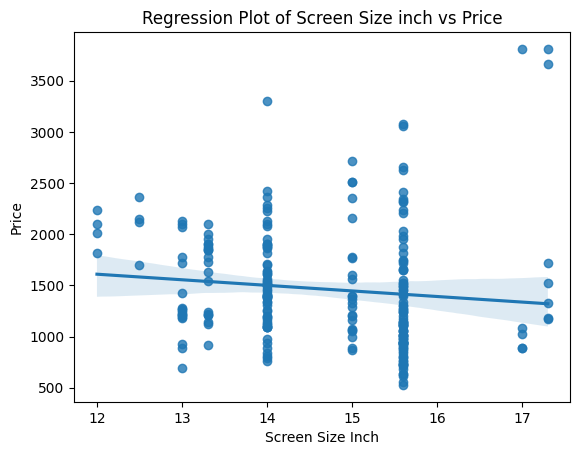

In [25]:
# Write your code below and press Shift+Enter to execute
# Screen_Size_inch plot
sns.regplot(x = 'Screen_Size_inch' , y= 'Price' , data = df)
plt.xlabel("Screen Size Inch")
plt.ylabel("Price")
plt.title("Regression Plot of Screen Size inch vs Price")

From the Figure , we see that we've a weak correlation between 'Screen Size inch' and 'Price'

# Get the Pearson Correlation between Screen Size inch and Price

In [26]:
ss_pearson_coef , ss_p_value = stats.pearsonr(df['Screen_Size_inch'] , df['Price'])
print("Pearson Coefficient = " , ss_pearson_coef)
print("P-value = " , ss_p_value)

Pearson Coefficient =  -0.11064420817118269
P-value =  0.08853397846830766


Since , Pearson Coefficient is negative (close to 0) and p-value is less than 0.1 and greater than 0.05 , then we've no relationship between screen size inch and price , so we can't use screen size inch to predict price

# Let's the Third way to get the correlation coefficient

In [31]:
df[['Screen_Size_inch' , 'Price']].corr()

,Screen_Size_inch,Price
Screen_Size_inch,1.000000,-0.110644
Price,-0.110644,1.000000


<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="Screen_Size_inch", y="Price", data=df)
plt.ylim(0,)
```

</details>


# Visualize the Regression plot for Weight_pounds and Price

Text(0.5, 1.0, 'Regression Plot For Weight Pounds vs Price')

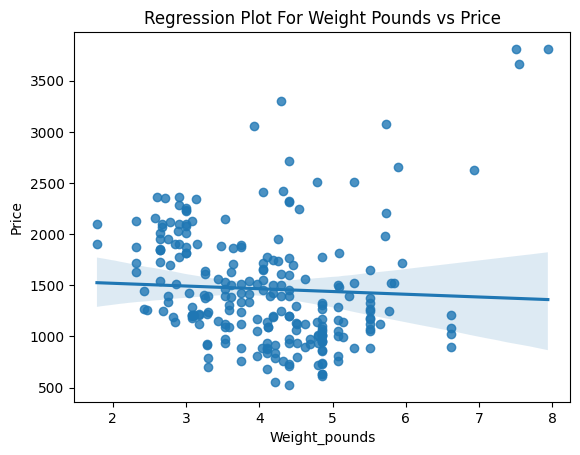

In [32]:
# Write your code below and press Shift+Enter to execute
# Weight_pounds plot
sns.regplot(x = 'Weight_pounds' , y='Price' , data = df)
plt.xlabel("Weight_pounds")
plt.ylabel("Price")
plt.title("Regression Plot For Weight Pounds vs Price")

<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="Weight_pounds", y="Price", data=df)
plt.ylim(0,)
```

</details>


# Get the correlation values of three attributes with price

# First Way

In [33]:
# Correlation values of the three attributes with Price
df[['CPU_frequency' , 'Screen_Size_inch' , 'Weight_pounds' , 'Price']].corr()

,CPU_frequency,Screen_Size_inch,Weight_pounds,Price
CPU_frequency,1.000000,-0.000948,0.066522,0.366666
Screen_Size_inch,-0.000948,1.000000,0.797534,-0.110644
Weight_pounds,0.066522,0.797534,1.000000,-0.050312
Price,0.366666,-0.110644,-0.050312,1.000000


# Second Way

In [35]:
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())

Correlation of Price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is                    Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
Correlation of Price and Weight_pounds is                 Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


# Third Way

In [37]:
for param in ["CPU_frequency" , "Screen_Size_inch" , "Weight_pounds"]:
    print(df[[param , "Price"]].corr())

               CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
                  Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
               Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


<details>
    <summary>Click here for Solution</summary>

```python
for param in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"Correlation of Price and {param} is ", df[[param,"Price"]].corr())
```

</details>


Interpretation: "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.


### Categorical features
Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"


# Visualize The Box Plot of Correlation between Category and Price

Text(0.5, 1.0, 'Box Plot of Correlation between Category vs Price')

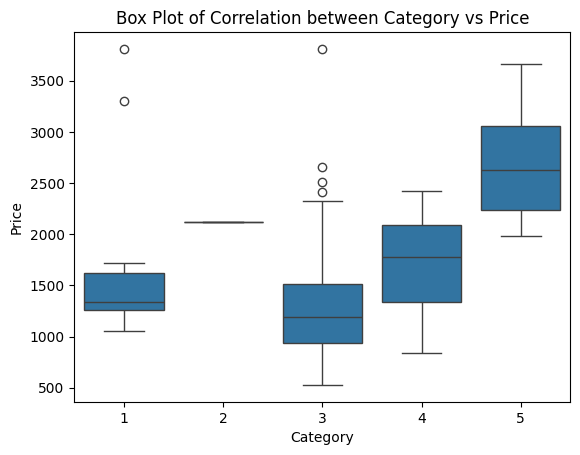

In [38]:
# Write your code below and press Shift+Enter to execute
# Category Box plot
sns.boxplot(x = 'Category' , y = 'Price' , data = df)
plt.xlabel("Category")
plt.ylabel("Price")
plt.title("Box Plot of Correlation between Category vs Price")

From the box plot , there is no much overlapping in boxes , so we can use Category to predict the price

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="Category", y="Price", data=df)
```

</details>


# Visulaize the Box Plot of Correlation between GPU and Price

Text(0.5, 1.0, 'Box Plot of Correlation between GPU vs Price')

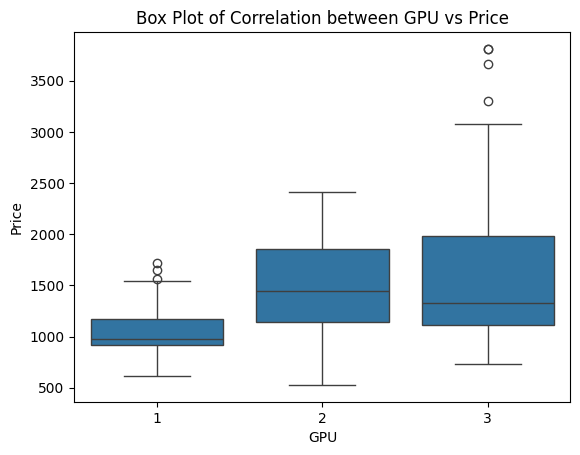

In [40]:
# Write your code below and press Shift+Enter to execute
# GPU Box plot
sns.boxplot(x = 'GPU' , y = 'Price' , data =df)
plt.xlabel("GPU")
plt.ylabel("Price")
plt.title("Box Plot of Correlation between GPU vs Price")

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="GPU", y="Price", data=df)
```

</details>


# Visualize the Box Plot for the correlation between OS and Price

Text(0.5, 1.0, 'Correlation between Os vs Price')

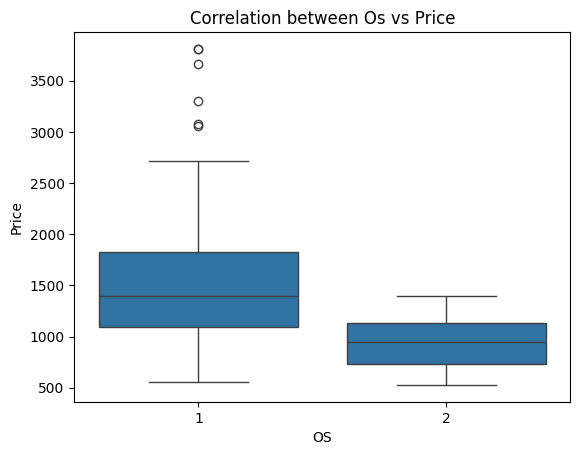

In [41]:
# Write your code below and press Shift+Enter to execute
# OS Box plot
sns.boxplot(x = 'OS' , y = 'Price' , data = df)
plt.xlabel("OS")
plt.ylabel("Price")
plt.title("Correlation between Os vs Price")

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="OS", y="Price", data=df)
```

</details>


# Visualize the Box Plot for the correlation between CPU_core and Price

Text(0.5, 1.0, 'Correlation between Cpu Core vs Price')

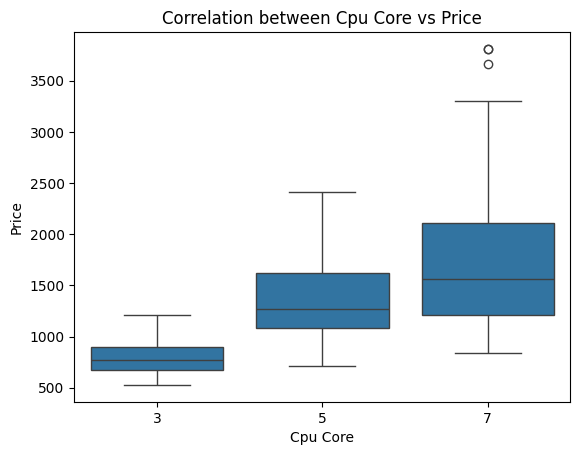

In [42]:
# Write your code below and press Shift+Enter to execute
# CPU_core Box plot
sns.boxplot(x = 'CPU_core' , y = 'Price' , data=df)
plt.xlabel("Cpu Core")
plt.ylabel("Price")
plt.title("Correlation between Cpu Core vs Price")

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="CPU_core", y="Price", data=df)
```

</details>


# Visualize the Correlation between Ram GB and Price

Text(0.5, 1.0, 'Correlation between Ram Amount and Price')

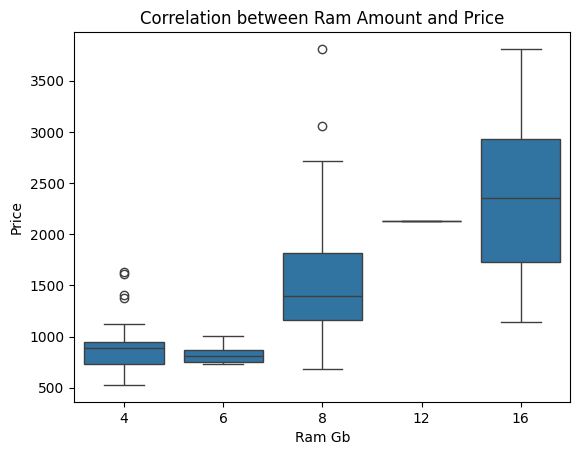

In [43]:
# Write your code below and press Shift+Enter to execute
# RAM_GB Box plot
sns.boxplot(x = 'RAM_GB' , y = 'Price' , data = df)
plt.xlabel('Ram Gb')
plt.ylabel('Price')
plt.title("Correlation between Ram Amount and Price")

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="RAM_GB", y="Price", data=df)
```

</details>


# Visualize the Correlation between Storage SSD Amount and Price

Text(0.5, 1.0, 'Correlation between Storage Amount vs Price')

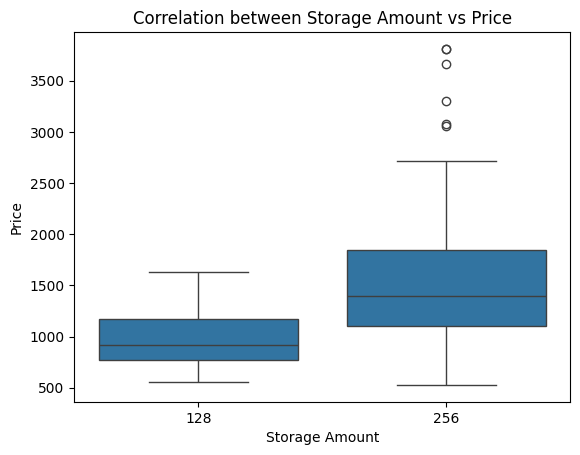

In [44]:
# Write your code below and press Shift+Enter to execute
# Storage_GB_SSD Box plot
sns.boxplot(x = 'Storage_GB_SSD' , y = 'Price' , data = df)
plt.xlabel('Storage Amount')
plt.ylabel('Price')
plt.title("Correlation between Storage Amount vs Price")

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)
```

</details>


# Task 2 - Descriptive Statistical Analysis


Generate the statistical description of all the features being used in the data set. Include "object" data types as well.


In [47]:
df.describe()

,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


In [46]:
# Write your code below and press Shift+Enter to execute
df.describe(include = ['object'])

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


<details>
<summary>Click here for Solution</summary>

```python
print(df.describe())
print(df.describe(include=['object']))
```

</details>


# Task 3 - GroupBy and Pivot Tables

Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.


In [50]:
# Write your code below and press Shift+Enter to execute
# Create the group
gpu_cpu_core_group = df[['GPU' , 'CPU_core' , 'Price']]
gpu_cpu_core_group = gpu_cpu_core_group.groupby(['GPU' , 'CPU_core'] , as_index = False).mean()

In [51]:
gpu_cpu_core_group

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


# Convert our Grouped Dataframe to a pivot table

We will get the repeated ones to the rows and other column to the columns in pivot table

In [52]:
gpu_cpu_core_pivot = gpu_cpu_core_group.pivot(index = 'GPU' , columns = 'CPU_core')

In [53]:
gpu_cpu_core_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

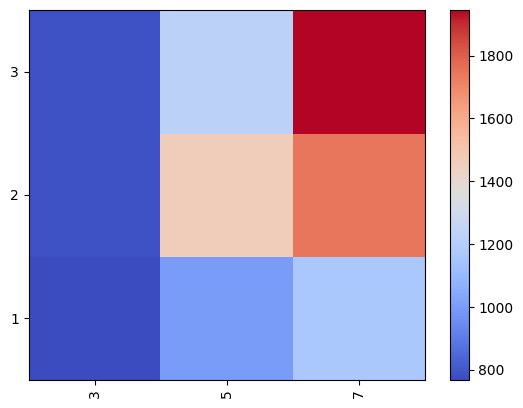

In [60]:
fig , ax = plt.subplots()
im = ax.pcolor(gpu_cpu_core_pivot , cmap = 'coolwarm')

# label names
row_labels = gpu_cpu_core_pivot.columns.levels[1]
col_labels = gpu_cpu_core_pivot.index

# Move the ticks and labels to the center
ax.set_xticks(np.arange(gpu_cpu_core_pivot.shape[1])+0.5 , minor = False)
ax.set_yticks(np.arange(gpu_cpu_core_pivot.shape[0])+0.5 , minor = False)

# Insert labels
ax.set_xticklabels(row_labels , minor = False)
ax.set_yticklabels(col_labels , minor = False)

# Rotate label if too long
plt.xticks(rotation = 90)

fig.colorbar(im)
plt.show()

<details>
<summary>Click here for Solution</summary>

```python
df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
print(grouped_test1)
```

</details>


# Congratulations! You have completed the lab


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-15|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-18|0.2|Vicky Kuo|Reviewed and Revised|


Copyright © 2023 IBM Corporation. All rights reserved.
